In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_file, show, output_notebook
from bokeh.models import CategoricalColorMapper
from bokeh.plotting import ColumnDataSource, figure
from bokeh.palettes import Plasma256



In [2]:
reg2018 = pd.read_csv('data/2018agg_regular_season.csv')
indexedreg2018 = reg2018.set_index(['Ev_Team', 'Game_Id']).sort_index()


In [3]:
indexedreg2018.head()

Unnamed: 0  Shot_Att  Misses  SOG_for  Hits_for  Blocks_A  \
Ev_Team Game_Id                                                              
ANA     20011            20        68      16       41        27        11   
        20029            56        49      14       23        16        12   
        20038            74        78      19       43        25        16   
        20049            96        59      17       30        19        12   
        20060           118        39      11       18        19        10   

                 Blocks_for  Shot_Att_A  SOG_A  Hits_A   ...        Miss%  \
Ev_Team Game_Id                                          ...                
ANA     20011            18          61     30      18   ...    28.070175   
        20029            15          58     37      17   ...    37.837838   
        20038            17          64     29      24   ...    30.645161   
        20049            22          75     41      21   ...    36.170213   
        20060            26          83     39      10   ...    37.931034   

                 wshF  wshA  Goals_for%  Fenwick_for%  Corsi_for%      wshF%  \
Ev_Team Game_Id                                                                
ANA     20011    17.6  15.4   55.555556     57.000000   52.713178  53.333333   
        20029    11.4  14.0   40.000000     46.250000   45.794393  44.881890   
        20038    15.6  14.4    0.000000     56.880734   54.929577  52.000000   
        20049    14.2  16.6   60.000000     47.000000   44.029851  46.103896   
        20060     8.6  19.0   25.000000     33.720930   31.967213  31.159420   

                       Sv%  Win  Season  
Ev_Team Game_Id                          
ANA     20011    86.666667    1    2018  
        20029    91.891892    0    2018  
        20038    93.103448    0    2018  
        20049    95.121951    1    2018  
        20060    92.307692    0    2018  

[5 rows x 29 columns]

In [4]:
reg2018so = pd.read_csv('data/2018agg_regular_season_so.csv')
indexedreg2018so = reg2018so.set_index(['Ev_Team', 'Game_Id']).sort_index()
indexedreg2018.head()

Unnamed: 0  Shot_Att  Misses  SOG_for  Hits_for  Blocks_A  \
Ev_Team Game_Id                                                              
ANA     20011            20        68      16       41        27        11   
        20029            56        49      14       23        16        12   
        20038            74        78      19       43        25        16   
        20049            96        59      17       30        19        12   
        20060           118        39      11       18        19        10   

                 Blocks_for  Shot_Att_A  SOG_A  Hits_A   ...        Miss%  \
Ev_Team Game_Id                                          ...                
ANA     20011            18          61     30      18   ...    28.070175   
        20029            15          58     37      17   ...    37.837838   
        20038            17          64     29      24   ...    30.645161   
        20049            22          75     41      21   ...    36.170213   
        20060            26          83     39      10   ...    37.931034   

                 wshF  wshA  Goals_for%  Fenwick_for%  Corsi_for%      wshF%  \
Ev_Team Game_Id                                                                
ANA     20011    17.6  15.4   55.555556     57.000000   52.713178  53.333333   
        20029    11.4  14.0   40.000000     46.250000   45.794393  44.881890   
        20038    15.6  14.4    0.000000     56.880734   54.929577  52.000000   
        20049    14.2  16.6   60.000000     47.000000   44.029851  46.103896   
        20060     8.6  19.0   25.000000     33.720930   31.967213  31.159420   

                       Sv%  Win  Season  
Ev_Team Game_Id                          
ANA     20011    86.666667    1    2018  
        20029    91.891892    0    2018  
        20038    93.103448    0    2018  
        20049    95.121951    1    2018  
        20060    92.307692    0    2018  

[5 rows x 29 columns]

In [5]:
teams = reg2018['Ev_Team'].unique()
teams

array(['TOR', 'WPG', 'PIT', 'STL', 'CGY', 'EDM', 'PHI', 'SJS', 'BOS',
       'NSH', 'BUF', 'MTL', 'COL', 'NYR', 'OTT', 'WSH', 'DET', 'MIN',
       'CHI', 'ANA', 'ARI', 'LAK', 'CBJ', 'NYI', 'FLA', 'TBL', 'DAL',
       'VGK', 'NJD', 'CAR', 'VAN'], dtype=object)

In [6]:
metro = ['CAR', 'CBJ','NJD','WSH','NYR','NYI','PHI','PIT']
atlantic = ['BOS','TOR','BUF','DET','FLA','MTL','OTT','TBL']
central = ['CHI','COL','DAL','MIN','NSH','STL','WPG']
pacific = ['ANA','ARI','CGY','EDM','LAK','SJS','VAN','VGK']

eastern_conference = metro + atlantic
western_conference = central + pacific
eastern_conference
western_conference

['CHI',
 'COL',
 'DAL',
 'MIN',
 'NSH',
 'STL',
 'WPG',
 'ANA',
 'ARI',
 'CGY',
 'EDM',
 'LAK',
 'SJS',
 'VAN',
 'VGK']

In [7]:
indexedreg2018.columns

Index(['Unnamed: 0', 'Shot_Att', 'Misses', 'SOG_for', 'Hits_for', 'Blocks_A',
       'Blocks_for', 'Shot_Att_A', 'SOG_A', 'Hits_A', 'Goals_for', 'Goals_A',
       'Saves', 'Shot_Percentage_for', 'Fenwick_for', 'Corsi_for', 'Corsi_A',
       'Fenwick_A', 'FSH%', 'Miss%', 'wshF', 'wshA', 'Goals_for%',
       'Fenwick_for%', 'Corsi_for%', 'wshF%', 'Sv%', 'Win', 'Season'],
      dtype='object')

In [8]:
metro2018 = indexedreg2018.loc[metro]

In [9]:
metro2018 = indexedreg2018so.loc[metro]
atlantic2018 = indexedreg2018so.loc[atlantic]
central2018 = indexedreg2018so.loc[central]
pacific2018 = indexedreg2018so.loc[pacific]

eastern_conference2018 = indexedreg2018so.loc[eastern_conference]
western_conference2018 = indexedreg2018so.loc[western_conference]

In [10]:
metro2018.reset_index(inplace=True)
atlantic2018.reset_index(inplace=True)
central2018.reset_index(inplace=True)
pacific2018.reset_index(inplace=True)
eastern_conference2018.reset_index(inplace=True)
western_conference2018.reset_index(inplace=True)

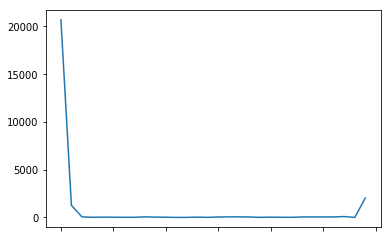

In [11]:
mean2018 = metro2018.mean(axis='rows')
mean2018.plot()
plt.show()

In [12]:
print(reg2018.describe())


        Unnamed: 0       Game_Id     Shot_Att       Misses      SOG_for  \
count  2542.000000   2542.000000  2542.000000  2542.000000  2542.000000   
mean   1270.500000  20636.000000    58.891424    12.213611    31.955940   
std     733.956516    366.978173    10.696192     4.128066     6.583974   
min       0.000000  20001.000000    28.000000     2.000000    14.000000   
25%     635.250000  20318.250000    51.250000     9.000000    27.000000   
50%    1270.500000  20636.000000    58.000000    12.000000    32.000000   
75%    1905.750000  20953.750000    66.000000    15.000000    36.000000   
max    2541.000000  21271.000000    95.000000    28.000000    60.000000   

          Hits_for     Blocks_A   Blocks_for   Shot_Att_A        SOG_A  \
count  2542.000000  2542.000000  2542.000000  2542.000000  2542.000000   
mean     21.585759    14.721873    14.721873    58.891424    31.955940   
std       7.293984     4.898512     4.898512    10.696192     6.583974   
min       2.000000     2.000

In [13]:
reg2017 = pd.read_csv('data/2017agg_regular_season.csv')
reg2017.set_index(['Ev_Team']).sort_index()
reg2017.describe()

,Unnamed: 0,Game_Id,Shot_Att,Misses,SOG_for,Hits_for,Blocks_A,Blocks_for,Shot_Att_A,SOG_A,...,Miss%,wshF,wshA,Goals_for%,Fenwick_for%,Corsi_for%,wshF%,Sv%,Win,Season
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,...,2460.000000,2460.000000,2460.000000,2458.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.0
mean,1229.500000,20615.500000,56.244309,11.792683,30.226423,21.741870,14.225203,14.225203,56.244309,30.226423,...,27.942104,13.429024,13.429024,50.000000,50.049840,50.000000,50.000000,90.688036,0.540244,2017.0
std,710.285154,355.142489,10.947101,4.267121,6.529530,7.931157,4.926265,4.926265,10.947101,6.529530,...,8.230586,2.479007,2.479007,24.773674,7.183451,7.554862,6.827014,5.840140,0.498479,0.0
min,0.000000,20001.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.000000,19.000000,12.000000,...,0.000000,4.600000,4.600000,0.000000,23.943662,20.754717,22.772277,61.111111,0.000000,2017.0
25%,614.750000,20308.000000,49.000000,9.000000,26.000000,16.000000,11.000000,11.000000,49.000000,26.000000,...,22.448980,11.800000,11.800000,33.333333,45.238095,44.910930,45.179211,86.956522,0.000000,2017.0
50%,1229.500000,20615.500000,56.000000,12.000000,30.000000,21.000000,14.000000,14.000000,56.000000,30.000000,...,27.906977,13.200000,13.200000,50.000000,50.000000,50.000000,50.000000,91.428571,1.000000,2017.0
75%,1844.250000,20923.000000,63.000000,14.000000,35.000000,27.000000,17.000000,17.000000,63.000000,35.000000,...,33.333333,15.000000,15.000000,66.666667,54.878049,55.089070,54.820789,95.238095,1.000000,2017.0
max,2459.000000,21230.000000,99.000000,29.000000,60.000000,64.000000,35.000000,35.000000,99.000000,60.000000,...,60.000000,21.600000,21.600000,100.000000,75.384615,79.245283,77.227723,100.000000,1.000000,2017.0


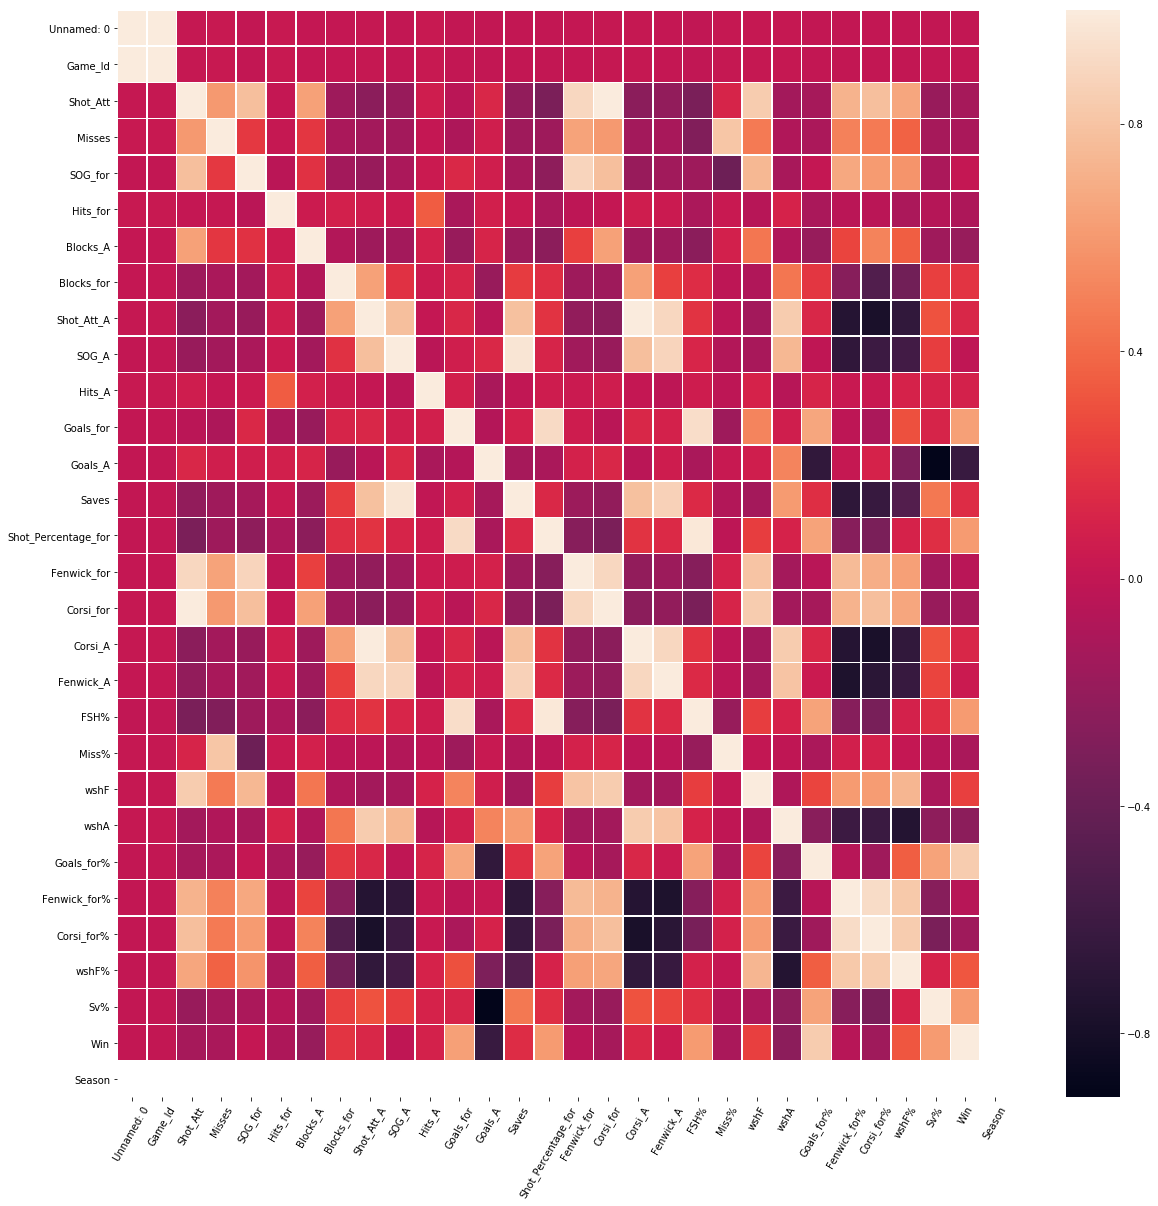

In [14]:
# Create box plot with Seaborn's default settings
corr = reg2018so.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, linewidths=.5, ax=ax,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.xticks(rotation =60)
plt.show()

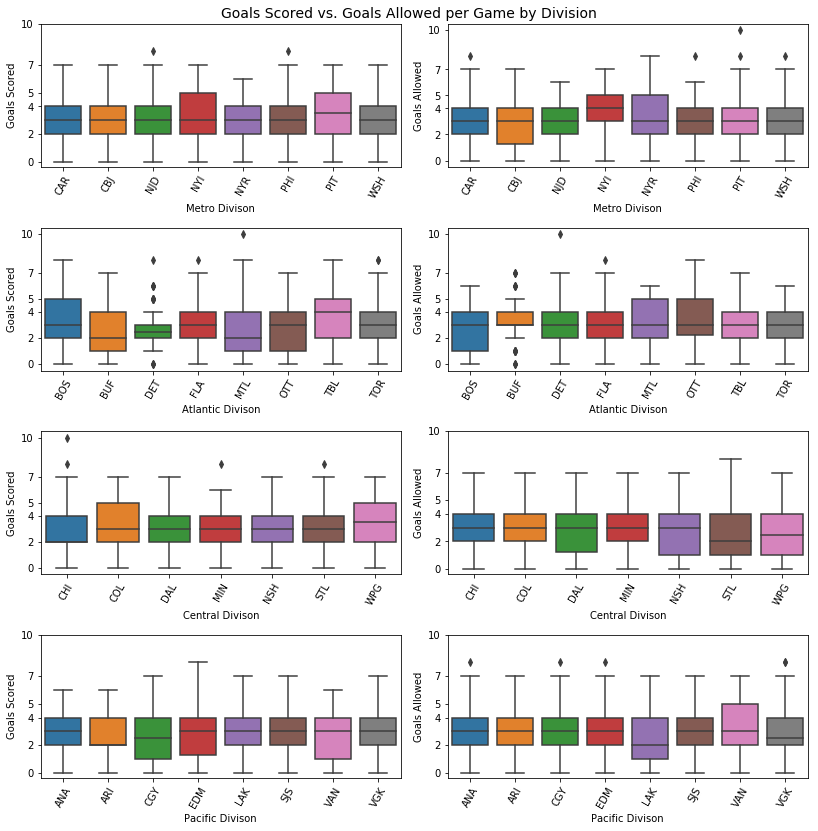

In [15]:
fig = plt.figure(figsize=(12,12))
plt.suptitle('Goals Scored vs. Goals Allowed per Game by Division', fontsize=14)
plt.subplot(4,2,1)
sns.boxplot(x='Ev_Team', y='Goals_for', data=metro2018)
# Label the axes
plt.xlabel('Metro Divison')
plt.ylabel('Goals Scored')
plt.xticks(rotation = 60)
plt.yticks(ticks=[0,2,4,5,7,10])

plt.subplot(4,2,2)
sns.boxplot(x='Ev_Team', y='Goals_A', data=metro2018)
# Label the axes
plt.xlabel('Metro Divison')
plt.ylabel('Goals Allowed')
plt.xticks(rotation = 60)
plt.yticks(ticks=[0,2,4,5,7,10])

plt.subplot(4,2,3)
sns.boxplot(x='Ev_Team', y='Goals_for', data=atlantic2018)
plt.xlabel('Atlantic Divison')
plt.ylabel('Goals Scored')
plt.xticks(rotation = 60)
plt.yticks(ticks=[0,2,4,5,7,10])

plt.subplot(4,2,4)
sns.boxplot(x='Ev_Team', y='Goals_A', data=atlantic2018)
plt.xlabel('Atlantic Divison')
plt.ylabel('Goals Allowed')
plt.xticks(rotation = 60)
plt.yticks(ticks=[0,2,4,5,7,10])

plt.subplot(4,2,5)
sns.boxplot(x='Ev_Team', y='Goals_for', data=central2018)
plt.xlabel('Central Divison')
plt.ylabel('Goals Scored')
plt.xticks(rotation = 60)
plt.yticks(ticks=[0,2,4,5,7,10])

plt.subplot(4,2,6)
sns.boxplot(x='Ev_Team', y='Goals_A', data=central2018)
plt.xlabel('Central Divison')
plt.ylabel('Goals Allowed')
plt.xticks(rotation = 60)
plt.yticks(ticks=[0,2,4,5,7,10])

plt.subplot(4,2,7)
sns.boxplot(x='Ev_Team', y='Goals_for', data=pacific2018)
plt.xlabel('Pacific Divison')
plt.xticks(rotation = 60)
plt.ylabel('Goals Scored')
plt.yticks(ticks=[0,2,4,5,7,10])

plt.subplot(4,2,8)
sns.boxplot(x='Ev_Team', y='Goals_A', data=pacific2018)
plt.xlabel('Pacific Divison')
plt.xticks(rotation = 60)
plt.ylabel('Goals Allowed')
plt.yticks(ticks=[0,2,4,5,7,10])

plt.tight_layout(pad=3.0,w_pad=1.0, h_pad=1.0)
plt.show()



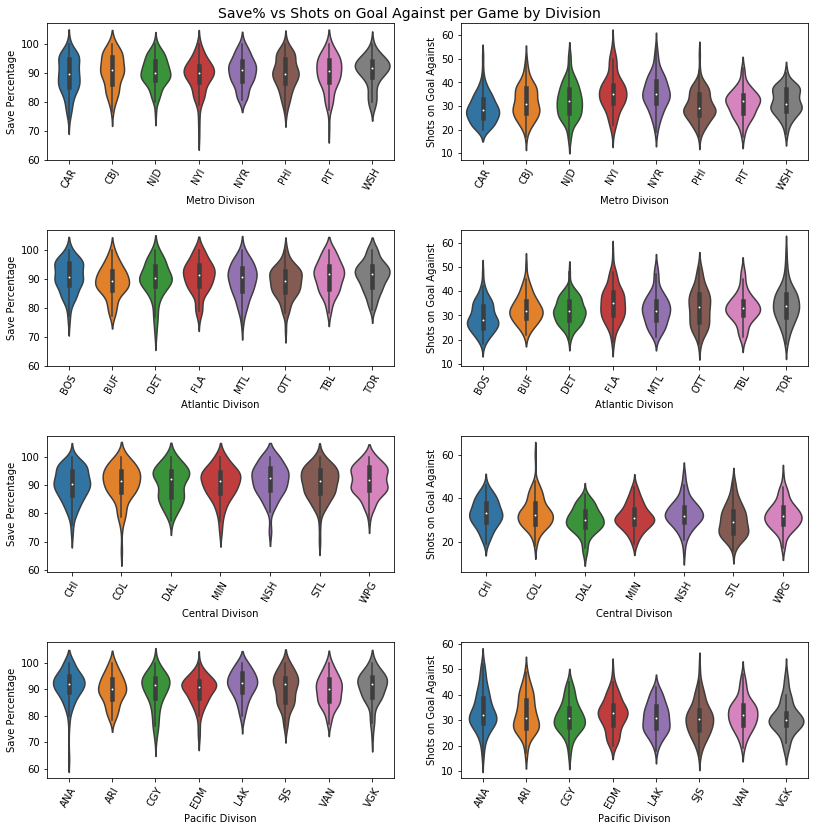

In [16]:

fig = plt.figure(figsize=(12, 12))
fig.suptitle('Save% vs Shots on Goal Against per Game by Division', fontsize=14)

plt.subplot(4,2,1)
sns.violinplot(x='Ev_Team', y='Sv%', data=metro2018)
plt.xlabel('Metro Divison')
plt.ylabel('Save Percentage')
plt.xticks(rotation = 60)
plt.yticks([60,70,80,90,100]) 

plt.subplot(4,2,2)
sns.violinplot(x='Ev_Team', y='SOG_A', data=metro2018)
plt.xlabel('Metro Divison')
plt.ylabel('Shots on Goal Against')
plt.xticks(rotation = 60)

plt.subplot(4,2,3)
sns.violinplot(x='Ev_Team', y='Sv%', data=atlantic2018)
plt.xlabel('Atlantic Divison')
plt.ylabel('Save Percentage')
plt.xticks(rotation = 60)
plt.yticks([60,70,80,90,100]) 

plt.subplot(4,2,4)
sns.violinplot(x='Ev_Team', y='SOG_A', data=atlantic2018)
plt.xlabel('Atlantic Divison')
plt.ylabel('Shots on Goal Against')
plt.xticks(rotation = 60)

plt.subplot(4,2,5)
sns.violinplot(x='Ev_Team', y='Sv%', data=central2018)
plt.xlabel('Central Divison')
plt.ylabel('Save Percentage')
plt.xticks(rotation = 60)
plt.yticks([60,70,80,90,100])

plt.subplot(4,2,6)
sns.violinplot(x='Ev_Team', y='SOG_A', data=central2018)
plt.xlabel('Central Divison')
plt.ylabel('Shots on Goal Against')
plt.xticks(rotation = 60)

plt.subplot(4,2,7)
sns.violinplot(x='Ev_Team', y='Sv%', data=pacific2018)
plt.xlabel('Pacific Divison')
plt.ylabel('Save Percentage')
plt.xticks(rotation = 60)
plt.yticks([60,70,80,90,100]) 

plt.subplot(4,2,8)
sns.violinplot(x='Ev_Team', y='SOG_A', data=pacific2018)
plt.xlabel('Pacific Divison')
plt.ylabel('Shots on Goal Against')
plt.xticks(rotation = 60)

plt.tight_layout(pad=3.0,w_pad=3.0, h_pad=2.0)
plt.show()




_ = sns.boxplot(x='Ev_Team', y='Blocks_for', data=metro2018)
_ = plt.xlabel('team')
_ = plt.ylabel('Team Blocks')


plt.show()



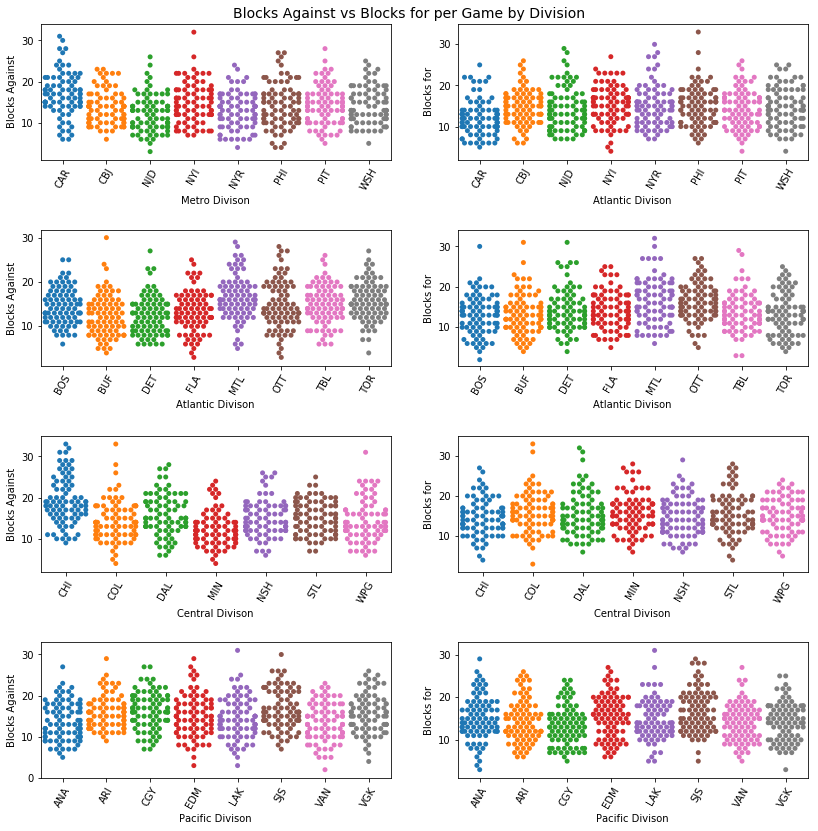

In [17]:
# Create box plot with Seaborn's default settings
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Blocks Against vs Blocks for per Game by Division', fontsize=14)

plt.subplot(4,2,1)
sns.swarmplot(x='Ev_Team', y='Blocks_A', data=metro2018)
# Label the axes
plt.xlabel('Metro Divison')
plt.ylabel('Blocks Against')
plt.xticks(rotation = 60)

plt.subplot(4,2,2)
sns.swarmplot(x='Ev_Team', y='Blocks_for', data=metro2018)
plt.xlabel('Atlantic Divison')
plt.ylabel('Blocks for')
plt.xticks(rotation = 60)


plt.subplot(4,2,3)
sns.swarmplot(x='Ev_Team', y='Blocks_A', data=atlantic2018)
plt.xlabel('Atlantic Divison')
plt.ylabel('Blocks Against')
plt.xticks(rotation = 60)
 
plt.subplot(4,2,4)
sns.swarmplot(x='Ev_Team', y='Blocks_for', data=atlantic2018)
plt.xlabel('Atlantic Divison')
plt.ylabel('Blocks for')
plt.xticks(rotation = 60)
    
plt.subplot(4,2,5)
sns.swarmplot(x='Ev_Team', y='Blocks_A', data=central2018)
plt.xlabel('Central Divison')
plt.ylabel('Blocks Against')
plt.xticks(rotation = 60)

plt.subplot(4,2,6)
sns.swarmplot(x='Ev_Team', y='Blocks_for', data=central2018)
plt.xlabel('Central Divison')
plt.ylabel('Blocks for')
plt.xticks(rotation = 60)

plt.subplot(4,2,7)
sns.swarmplot(x='Ev_Team', y='Blocks_A', data=pacific2018)
plt.xlabel('Pacific Divison')
plt.xticks(rotation = 60)
plt.ylabel('Blocks Against')

plt.subplot(4,2,8)
sns.swarmplot(x='Ev_Team', y='Blocks_for', data=pacific2018)
plt.xlabel('Pacific Divison')
plt.xticks(rotation = 60)
plt.ylabel('Blocks for')

plt.tight_layout(pad=3.0,w_pad=3.0, h_pad=2.0)
plt.show()



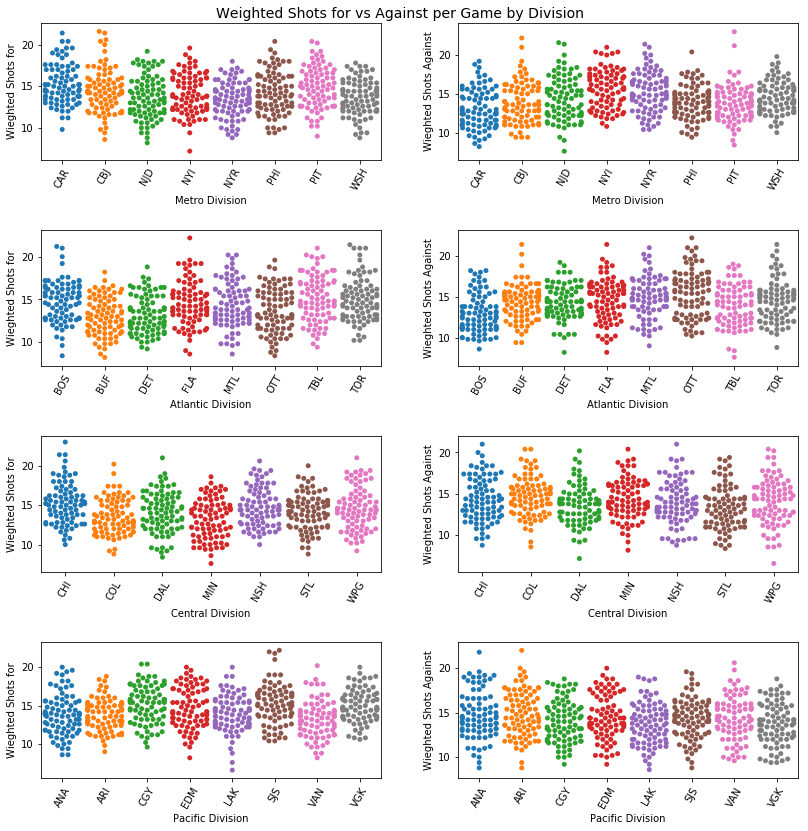

In [18]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Weighted Shots for vs Against per Game by Division', fontsize=14)

# Create box plot with Seaborn's default settings
plt.subplot(4,2,1)
sns.swarmplot(x='Ev_Team', y='wshF', data=metro2018)
# Label the axes
plt.xlabel('Metro Division')
plt.ylabel('Wieghted Shots for')
plt.xticks(rotation = 60)

plt.subplot(4,2,2)
sns.swarmplot(x='Ev_Team', y='wshA', data=metro2018)
# Label the axes
plt.xlabel('Metro Division')
plt.ylabel('Wieghted Shots Against')
plt.xticks(rotation = 60)

plt.subplot(4,2,3)
sns.swarmplot(x='Ev_Team', y='wshF', data=atlantic2018)
# Label the axes
plt.xlabel('Atlantic Division')
plt.ylabel('Wieghted Shots for')
plt.xticks(rotation = 60)

plt.subplot(4,2,4)
sns.swarmplot(x='Ev_Team', y='wshA', data=atlantic2018)
# Label the axes
plt.xlabel('Atlantic Division')
plt.ylabel('Wieghted Shots Against')
plt.xticks(rotation = 60)

plt.subplot(4,2,5)
sns.swarmplot(x='Ev_Team', y='wshF', data=central2018)
# Label the axes
plt.xlabel('Central Division')
plt.ylabel('Wieghted Shots for')
plt.xticks(rotation = 60)

plt.subplot(4,2,6)
sns.swarmplot(x='Ev_Team', y='wshA', data=central2018)
# Label the axes
plt.xlabel('Central Division')
plt.ylabel('Wieghted Shots Against')
plt.xticks(rotation = 60)

plt.subplot(4,2,7)
sns.swarmplot(x='Ev_Team', y='wshF', data=pacific2018)
# Label the axes
plt.xlabel('Pacific Division')
plt.ylabel('Wieghted Shots for')
plt.xticks(rotation = 60)

plt.subplot(4,2,8)
sns.swarmplot(x='Ev_Team', y='wshA', data=pacific2018)
# Label the axes
plt.xlabel('Pacific Division')
plt.ylabel('Wieghted Shots Against')
plt.xticks(rotation = 60)

plt.tight_layout(pad=3.0,w_pad=3.0, h_pad=2.0)
# Show the plot
plt.show()

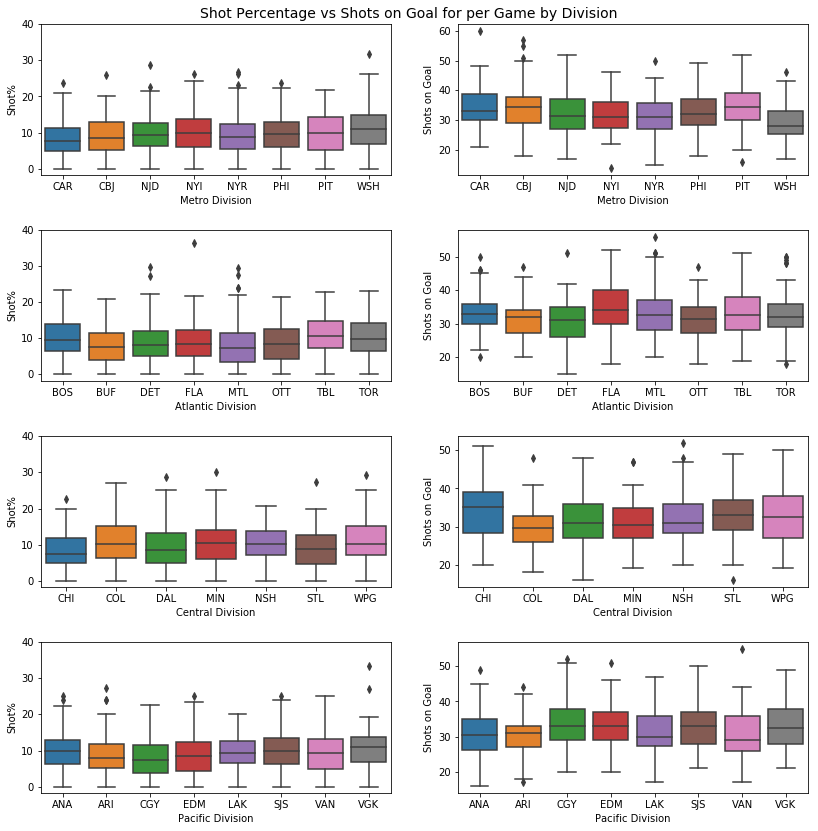

In [19]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Shot Percentage vs Shots on Goal for per Game by Division', fontsize=14)
# 
plt.subplot(4,2,1)
sns.boxplot(x='Ev_Team', y='Shot_Percentage_for', data=metro2018)
plt.xlabel('Metro Division')
plt.ylabel('Shot%')
plt.yticks([0,10,20,30,40])

plt.subplot(4,2,2)
sns.boxplot(x='Ev_Team', y='SOG_for', data=metro2018)
plt.xlabel('Metro Division')
plt.ylabel('Shots on Goal')

plt.subplot(4,2,3)
sns.boxplot(x='Ev_Team', y='Shot_Percentage_for', data=atlantic2018)
plt.xlabel('Atlantic Division')
plt.ylabel('Shot%')
plt.yticks([0,10,20,30,40])

plt.subplot(4,2,4)
sns.boxplot(x='Ev_Team', y='SOG_for', data=atlantic2018)
plt.xlabel('Atlantic Division')
plt.ylabel('Shots on Goal')

plt.subplot(4,2,5)
sns.boxplot(x='Ev_Team', y='Shot_Percentage_for', data=central2018)
plt.xlabel('Central Division')
plt.ylabel('Shot%')
plt.yticks([0,10,20,30,40])

plt.subplot(4,2,6)
sns.boxplot(x='Ev_Team', y='SOG_for', data=central2018)
plt.xlabel('Central Division')
plt.ylabel('Shots on Goal')

plt.subplot(4,2,7)
sns.boxplot(x='Ev_Team', y='Shot_Percentage_for', data=pacific2018)
plt.xlabel('Pacific Division')
plt.ylabel('Shot%')
plt.yticks([0,10,20,30,40])

plt.subplot(4,2,8)
sns.boxplot(x='Ev_Team', y='SOG_for', data=pacific2018)
plt.xlabel('Pacific Division')
plt.ylabel('Shots on Goal')

# Show the plot
plt.tight_layout(pad=3.0,w_pad=3.0, h_pad=2.0)
plt.show()



In [20]:
atlantic2018byTeam = atlantic2018.groupby(['Ev_Team'])
atlantic2018Wins = atlantic2018byTeam.Win.sum()
pacific2018byTeam = pacific2018.groupby(['Ev_Team'])
pacific2018Wins = pacific2018byTeam.Win.sum()
central2018byTeam = central2018.groupby(['Ev_Team'])
central2018Wins = central2018byTeam.Win.sum()



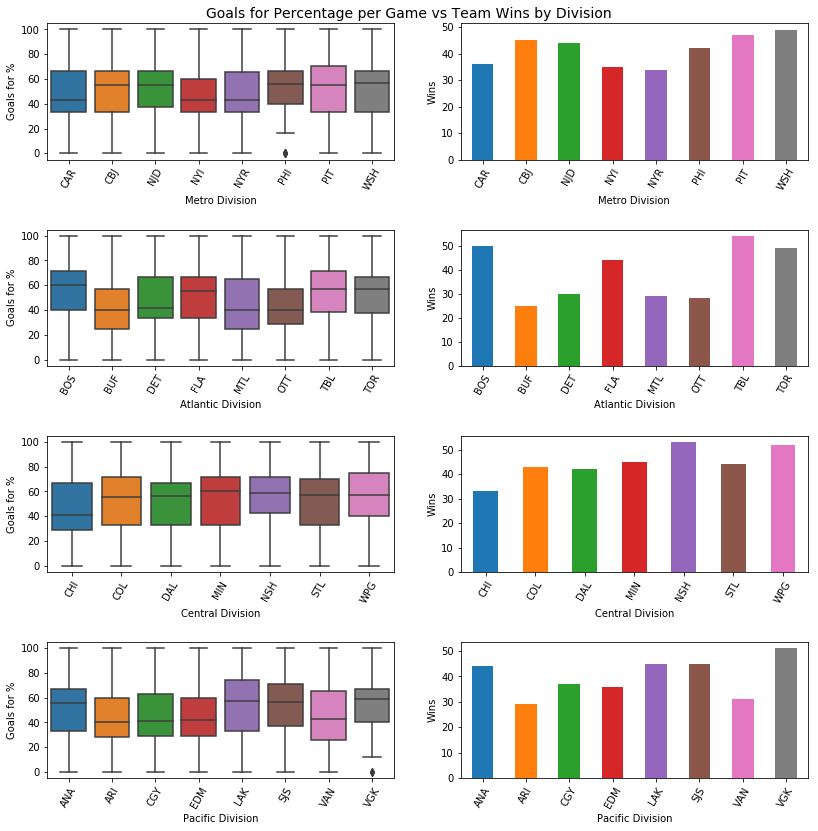

In [32]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Goals for Percentage per Game vs Team Wins by Division', fontsize=14)
# 
plt.subplot(4,2,1)
sns.boxplot(x='Ev_Team', y='Goals_for%',data=metro2018)
plt.xlabel('Metro Division')
plt.ylabel('Goals for %')
plt.xticks(rotation = 60)

plt.subplot(4,2,2)
metro2018Wins.plot(kind='bar')
plt.ylabel('Wins')
plt.xlabel('Metro Division')
plt.xticks(rotation = 60)

plt.subplot(4,2,3)
sns.boxplot(x='Ev_Team', y='Goals_for%',data=atlantic2018)
plt.xlabel('Atlantic Division')
plt.ylabel('Goals for %')
plt.xticks(rotation = 60)

plt.subplot(4,2,4)
atlantic2018Wins.plot(kind='bar')
plt.ylabel('Wins')
plt.xlabel('Atlantic Division')
plt.xticks(rotation = 60)

plt.subplot(4,2,5)
sns.boxplot(x='Ev_Team', y='Goals_for%',data=central2018)
plt.xlabel('Central Division')
plt.ylabel('Goals for %')
plt.xticks(rotation = 60)

plt.subplot(4,2,6)
central2018Wins.plot(kind='bar')
plt.ylabel('Wins')
plt.xlabel('Central Division')
plt.xticks(rotation = 60)

plt.subplot(4,2,7)
sns.boxplot(x='Ev_Team', y='Goals_for%',data=pacific2018)
plt.xlabel('Pacific Division')
plt.ylabel('Goals for %')
plt.xticks(rotation = 60)

plt.subplot(4,2,8)
pacific2018Wins.plot(kind='bar')
plt.ylabel('Wins')
plt.xlabel('Pacific Division')
plt.xticks(rotation = 60)

plt.tight_layout(pad=3.0,w_pad=3.0, h_pad=2.0)
plt.show()




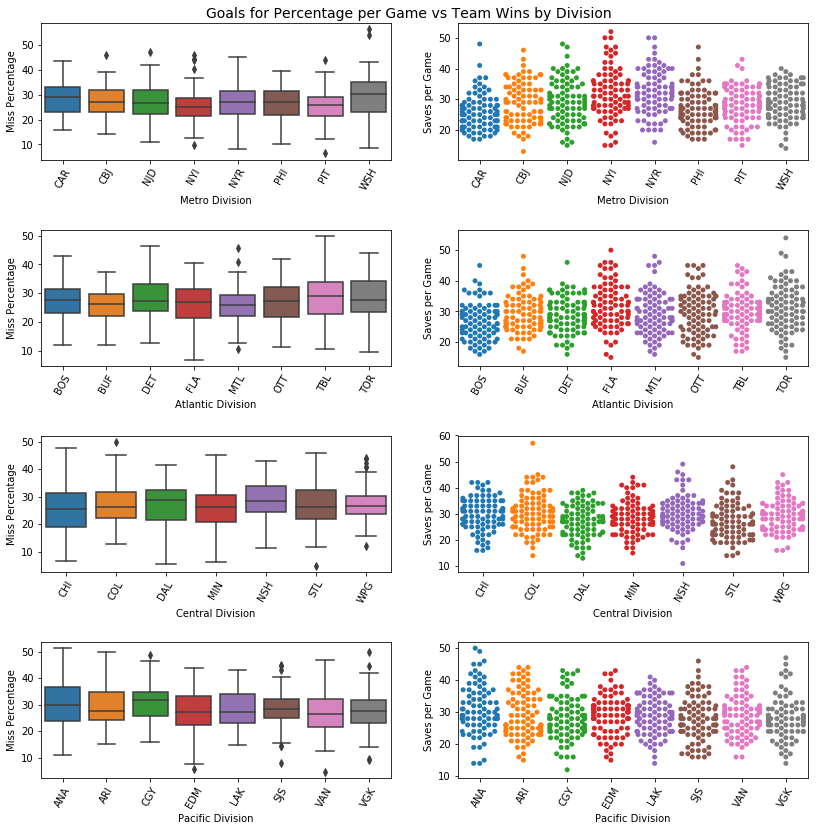

In [36]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Miss Percentage per Game & Saves by Division', fontsize=14)
 
plt.subplot(4,2,1)
sns.boxplot(x='Ev_Team', y='Miss%', data=metro2018)
plt.xlabel('Metro Division')
plt.ylabel('Miss Percentage')
plt.xticks(rotation = 60)

plt.subplot(4,2,2)
sns.swarmplot(x='Ev_Team', y='Saves', data=metro2018)
plt.xlabel('Metro Division')
plt.ylabel('Saves per Game')
plt.xticks(rotation = 60)

plt.subplot(4,2,3)
sns.boxplot(x='Ev_Team', y='Miss%', data=atlantic2018)
plt.xlabel('Atlantic Division')
plt.ylabel('Miss Percentage')
plt.xticks(rotation = 60)

plt.subplot(4,2,4)
sns.swarmplot(x='Ev_Team', y='Saves', data=atlantic2018)
plt.xlabel('Atlantic Division')
plt.ylabel('Saves per Game')
plt.xticks(rotation = 60)

plt.subplot(4,2,5)
sns.boxplot(x='Ev_Team', y='Miss%', data=central2018)
plt.xlabel('Central Division')
plt.ylabel('Miss Percentage')
plt.xticks(rotation = 60)

plt.subplot(4,2,6)
sns.swarmplot(x='Ev_Team', y='Saves', data=central2018)
plt.xlabel('Central Division')
plt.ylabel('Saves per Game')
plt.xticks(rotation = 60)

plt.subplot(4,2,7)
sns.boxplot(x='Ev_Team', y='Miss%', data=pacific2018)
plt.xlabel('Pacific Division')
plt.ylabel('Miss Percentage')
plt.xticks(rotation = 60)

plt.subplot(4,2,8)
sns.swarmplot(x='Ev_Team', y='Saves', data=pacific2018)
plt.xlabel('Pacific Division')
plt.ylabel('Saves per Game')
plt.xticks(rotation = 60)

# Show the plot
plt.tight_layout(pad=3.0,w_pad=3.0, h_pad=2.0)
plt.show()



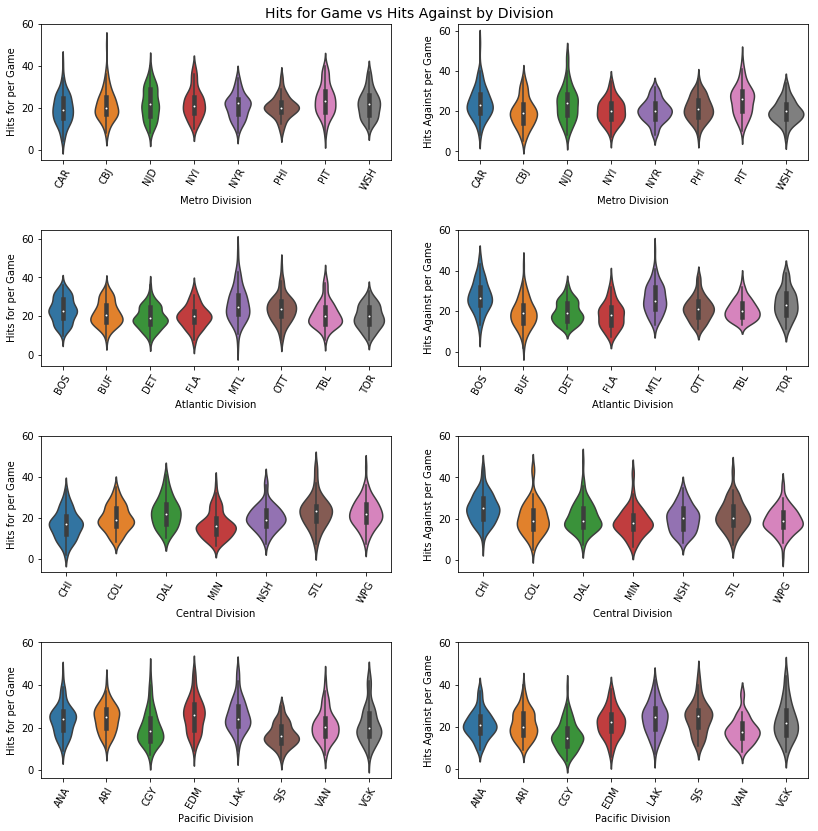

In [43]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Hits for Game vs Hits Against by Division', fontsize=14)
 
plt.subplot(4,2,1)
sns.violinplot(x='Ev_Team', y='Hits_for', data=metro2018)
plt.xlabel('Metro Division')
plt.ylabel('Hits for per Game')
plt.xticks(rotation = 60)
plt.yticks([0,20,40,60])

plt.subplot(4,2,2)
sns.violinplot(x='Ev_Team', y='Hits_A', data=metro2018)
plt.xlabel('Metro Division')
plt.ylabel('Hits Against per Game')
plt.xticks(rotation = 60)
plt.yticks([0,20,40,60])

plt.subplot(4,2,3)
sns.violinplot(x='Ev_Team', y='Hits_for', data=atlantic2018)
plt.xlabel('Atlantic Division')
plt.ylabel('Hits for per Game')
plt.xticks(rotation = 60)
plt.yticks([0,20,40,60])

plt.subplot(4,2,4)
sns.violinplot(x='Ev_Team', y='Hits_A', data=atlantic2018)
plt.xlabel('Atlantic Division')
plt.ylabel('Hits Against per Game')
plt.xticks(rotation = 60)
plt.yticks([0,20,40,60])

plt.subplot(4,2,5)
sns.violinplot(x='Ev_Team', y='Hits_for', data=central2018)
plt.xlabel('Central Division')
plt.ylabel('Hits for per Game')
plt.xticks(rotation = 60)
plt.yticks([0,20,40,60])

plt.subplot(4,2,6)
sns.violinplot(x='Ev_Team', y='Hits_A', data=central2018)
plt.xlabel('Central Division')
plt.ylabel('Hits Against per Game')
plt.xticks(rotation = 60)
plt.yticks([0,20,40,60])

plt.subplot(4,2,7)
sns.violinplot(x='Ev_Team', y='Hits_for', data=pacific2018)
plt.xlabel('Pacific Division')
plt.ylabel('Hits for per Game')
plt.xticks(rotation = 60)
plt.yticks([0,20,40,60])

plt.subplot(4,2,8)
sns.violinplot(x='Ev_Team', y='Hits_A', data=pacific2018)
plt.xlabel('Pacific Division')
plt.ylabel('Hits Against per Game')
plt.xticks(rotation = 60)
plt.yticks([0,20,40,60])

plt.tight_layout(pad=3.0,w_pad=3.0, h_pad=2.0)
plt.show()

In [ ]:
metro2018.columns

In [31]:
metro2018byTeam = metro2018.groupby(['Ev_Team'])
metro2018Wins = metro2018byTeam.Win.sum()
atlantic2018byTeam = atlantic2018.groupby(['Ev_Team'])
atlantic2018Wins = atlantic2018byTeam.Win.sum()
pacific2018byTeam = pacific2018.groupby(['Ev_Team'])
pacific2018Wins = pacific2018byTeam.Win.sum()
central2018byTeam = central2018.groupby(['Ev_Team'])
central2018Wins = central2018byTeam.Win.sum()


In [23]:
central2018Wins

Ev_Team
CHI    33
COL    43
DAL    42
MIN    45
NSH    53
STL    44
WPG    52
Name: Win, dtype: int64

In [26]:
source = ColumnDataSource(metro2018)
color_mapper = CategoricalColorMapper(factors = metro, palette='Plasma256')
#p1 = figure(title='Blocks Against vs Blocks for per Game by Division',x_axis_label='Blocks_for', y_axis_label='amount of blocks')
#p1.circle('Blocks_for','Blocks_A', source = source, size=8, color=dict(field='Ev_Team', transform='color_mapper'), legend='Ev_Team')
#p1.triangle('Blocks_A', source = source, size=8, color=dict(field='Ev_Team', transform='color_mapper'), legend='Ev_Team')




#output_file('test.html')
output_notebook()
show(p1)



Loading BokehJS ...

In [25]:
p1 = figure(title='Blocks Against vs Blocks for per Game by Division',x_axis_label='Blocks_for', y_axis_label='amount of blocks')
p1.circle('Sv%','SOG_A', source = source, size=8, color=dict(field='Ev_Team', transform='color_mapper'), legend='Ev_Team')

GlyphRenderer(id='1043', ...)

In [27]:
show(p1)

In [28]:
regDf2014 = pd.read_csv('data/2014agg_regular_season_so.csv')
indexedregDf2014 = regDf2014.set_index(['Ev_Team', 'Game_Id']).sort_index()
indexedregDf2014.head()

Unnamed: 0  Shot_Att  Misses  SOG_for  Hits_for  Blocks_A  \
Ev_Team Game_Id                                                              
ANA     20006            10        59      10       36        13        13   
        20029            56        43       6       30        20         7   
        20033            64        61      14       34        21        13   
        20057           112        57       9       37        22        11   
        20078           154        88      21       56        17        11   

                 Blocks_for  Shot_Att_A  SOG_A  Hits_A   ...        Miss%  \
Ev_Team Game_Id                                          ...                
ANA     20006             9          50     29      21   ...    21.739130   
        20029            19          66     33      23   ...    16.666667   
        20033            17          44     17      25   ...    29.166667   
        20057            13          53     34      26   ...    19.565217   
        20078            18          65     31      28   ...    27.272727   

                 wshF  wshA  Goals_for%  Fenwick_for%  Corsi_for%      wshF%  \
Ev_Team Game_Id                                                                
ANA     20006    12.6  14.8   14.285714     52.873563   54.128440  45.985401   
        20029    11.8  15.6   57.142857     43.373494   39.449541  43.065693   
        20033    14.6  10.4   60.000000     64.000000   58.095238  58.400000   
        20057    16.2  10.6  100.000000     53.488372   51.818182  60.447761   
        20078    20.8  13.8   80.000000     62.096774   57.516340  60.115607   

                        Sv%  Win  Season  
Ev_Team Game_Id                           
ANA     20006     79.310345    0    2014  
        20029     90.909091    1    2014  
        20033     88.235294    1    2014  
        20057    100.000000    1    2014  
        20078     96.774194    1    2014  

[5 rows x 29 columns]

In [459]:
pacific2014 = indexedregDf2014.loc[pacific]
pacific2014.head()

Unnamed: 0  Shot_Att  Misses  SOG_for  Hits_for  Blocks_A  \
Ev_Team Game_Id                                                              
ANA     20006            10        59      10       36        13        13   
        20029            56        43       6       30        20         7   
        20033            64        61      14       34        21        13   
        20057           112        57       9       37        22        11   
        20078           154        88      21       56        17        11   

                 Blocks_for  Shot_Att_A  SOG_A  Hits_A   ...        Miss%  \
Ev_Team Game_Id                                          ...                
ANA     20006             9          50     29      21   ...    21.739130   
        20029            19          66     33      23   ...    16.666667   
        20033            17          44     17      25   ...    29.166667   
        20057            13          53     34      26   ...    19.565217   
        20078            18          65     31      28   ...    27.272727   

                 wshF  wshA  Goals_for%  Fenwick_for%  Corsi_for%      wshF%  \
Ev_Team Game_Id                                                                
ANA     20006    12.6  14.8   14.285714     52.873563   54.128440  45.985401   
        20029    11.8  15.6   57.142857     43.373494   39.449541  43.065693   
        20033    14.6  10.4   60.000000     64.000000   58.095238  58.400000   
        20057    16.2  10.6  100.000000     53.488372   51.818182  60.447761   
        20078    20.8  13.8   80.000000     62.096774   57.516340  60.115607   

                        Sv%  Win  Season  
Ev_Team Game_Id                           
ANA     20006     79.310345    0    2014  
        20029     90.909091    1    2014  
        20033     88.235294    1    2014  
        20057    100.000000    1    2014  
        20078     96.774194    1    2014  

[5 rows x 29 columns]